In [137]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


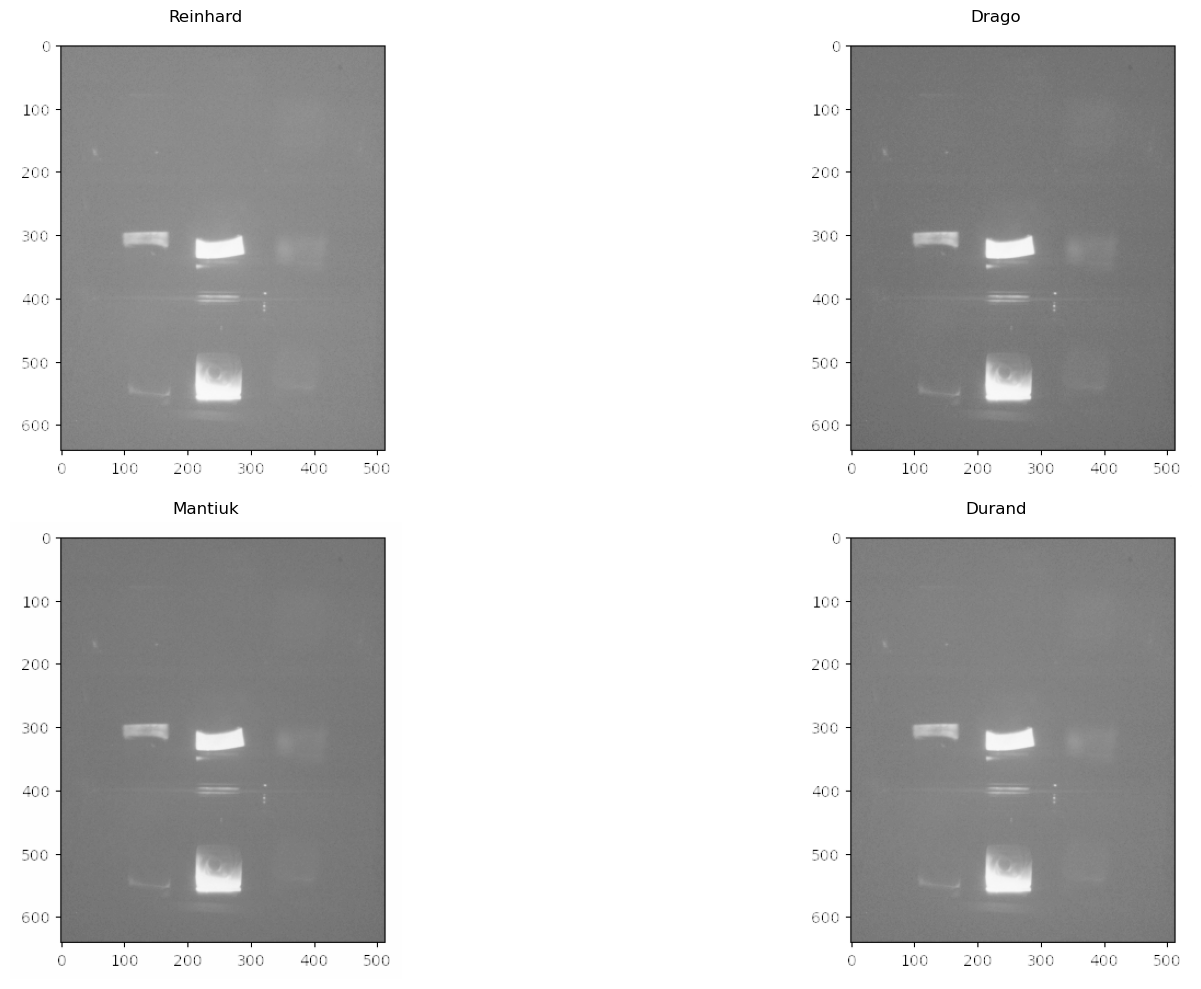

In [138]:
def apply_tone_mapping(hdr_image, method='reinhard'):
    
    if method == 'reinhard':
        tonemap = cv2.createTonemapReinhard(gamma=2.2).apply(hdr_image)
        ldr_image = tonemap.process(hdr_image)
    elif method == 'drago':
        tonemap = cv2.createTonemapDrago(gamma=2.2).apply(hdr_image)
        ldr_image = tonemap.process(hdr_image)
    elif method == 'mantiuk':
        tonemap = cv2.createTonemapMantiuk(gamma=2.2).apply(hdr_image)
        ldr_image = tonemap.process(hdr_image)
    elif method == 'durand':
        if hasattr(cv2, 'createTonemapDurand'):
            tonemap = cv2.createTonemapDurand(gamma=2.2).apply(hdr_image)
    else:
        print("createTonemapDurand is not available. Falling back to Reinhard.")
        tonemap = cv2.createTonemapReinhard(gamma=2.2).apply(hdr_image)
        ldr_image = tonemap.process(hdr_image)
        
    ldr_image = np.clip(ldr_image * 255, 0, 255).astype(np.uint8)

    return ldr_image

# Load your 32-bit HDR image
#hdr_image_path = 'C:\\Users\\chetu\\OneDrive\\Documents\\GitHub\\notebooks\\Main\\240625_HDRoutput_760_1300.tif'
hdr_image = Image.open('C:\\Users\\chetu\\OneDrive\\Documents\\GitHub\\notebooks\\Main\\AmishCRF.png')
#hdr_image = cv2.imread(hdr_image_path, cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR)
hdr_array = np.array(hdr_image)


# Plot the images
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.imshow(reinhard_ldr, cmap='gray')
plt.title('Reinhard')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(drago_ldr, cmap='gray')
plt.title('Drago')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(mantiuk_ldr, cmap='gray')
plt.title('Mantiuk')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(durand_ldr, cmap='gray')
plt.title('Durand')
plt.axis('off')


plt.tight_layout()
plt.show()
